In [1]:
import pandas as pd
df = pd.read_csv("crypto_data.csv")
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [2]:
is_trading = df.loc[df["IsTrading"] == True]
is_trading["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [3]:
df = is_trading.drop("IsTrading",axis=1)
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [4]:
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.5+ KB


In [5]:
mined = df.loc[df["TotalCoinsMined"] > 0]
mined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.1+ KB


In [6]:
df = mined.drop("CoinName",axis=1)
df = df.drop('Unnamed: 0',axis=1)

In [7]:
df = pd.get_dummies(data=df,columns=['Algorithm', 'ProofType'])

df.shape

(532, 98)

In [8]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df)
df_scaled.shape

(532, 98)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.9)
components = pca.fit_transform(df_scaled)
components.shape

(532, 74)

In [10]:
from sklearn.manifold import TSNE
X_embedded = TSNE().fit_transform(components)
X_embedded.shape

(532, 2)

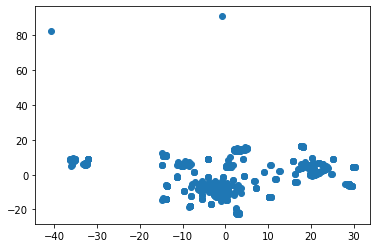

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()

<AxesSubplot:xlabel='k'>

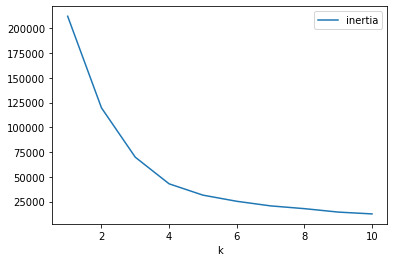

In [13]:
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_embedded)
    inertia.append(km.inertia_)
    
# Create the Elbow Curve using hvplot
elbow_data = {"k" : k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()
df_elbow.plot(x='k',y='inertia')